# Unit Hydrolgraph
**Unit hydrograph (UH)** is a direct runoff hydrograph resulting from one unit (one mm or one cm) of constant intensity uniform rainfall occurring over the entire watershed. More details can be found in this [link](https://serc.carleton.edu/hydromodules/steps/derivation_unit.html#:~:text=Unit%20hydrograph%20is%20a%20direct,principles%20of%20superposition%20and%20proportionality.).
For the `PyWaterEng` package, you can:
* Create and visualize a UH
* Compute surface runoff caused by effective rainfalls by UH
* Derive a UH with longer duration
* Derive a UH with shorter duration by S-Curve method
* Estimate UH from observed flow rate record

In [1]:
from hydrology import Runoff as rof
from hydrology.Runoff import UnitHydrograph

## Create Unit Hydrograph
Create a **Unit Hydrograph** based on data.

In [2]:
times = list(range(0, 14+1, 2))
values = [0, 12, 42, 70, 51, 22, 10, 0]
uh = UnitHydrograph(times, values, duration=2, timestep=2, baseflow=0)
uh # print uh

[Unit Hydrograph]
Time	Value
0	0
2	12
4	42
6	70
8	51
10	22
12	10
14	0

## Plot
Plot the unit hydrograph.

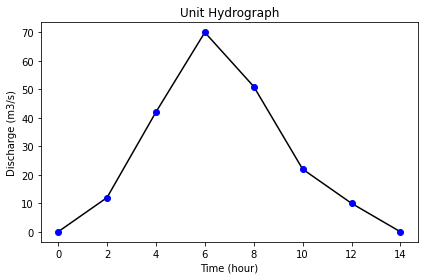

In [3]:
uh.plot()

## Surface runoff
Compute surface runoff caused by effective rainfalls by UH.

[Surface Runoff]
Time	Value
0	0.0
2	240.0
4	1320.0
6	3080.0
8	3820.0
10	2480.0
12	1080.0
14	400.0
16	0.0

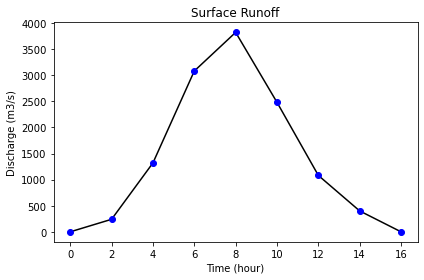

In [4]:
excessRainfall = [20, 40, 0]
surfaceRunoff = uh.surface_runoff(excessRainfall)
surfaceRunoff.plot()
surfaceRunoff

## Change UH duration
### Derivation of a higher duration UH 
Get a UH with longer duration from a lower duration UH. Then, plot and print the new unit hydrograph.

[Unit Hydrograph]
Time	Value
0	0.0
2	6.0
4	27.0
6	56.0
8	60.5
10	36.5
12	16.0
14	5.0
16	0.0

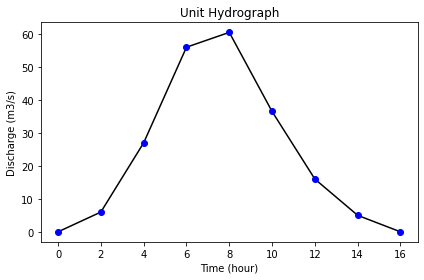

In [5]:
uh4 = uh.duration_increase(newDuration=4)
uh4.plot()
uh4

### Decrease duration
Derivation of a lower duration UH from a higher duration UH, then plot and print the new unit hydrograph. It should be noted that the derived `uh2` is identical to `uh` in previous sections. Both of them have a duration of 2 hours.

In [6]:
# You can prolong end time of unit hydrograph using `maxTime`.
uh2 = uh4.duration_decrease(newDuration=2, maxTime=25)
uh2


[Unit Hydrograph]
Time	Value
0	0.0
2	12.0
4	42.0
6	70.0
8	51.0
10	22.0
12	10.0
14	0.0
16	0.0
18	0.0
20	0.0

Getting a unit hydrograph with shorter duration has a much more complex process, which use the **S curve** that **your professor might be interested :)**. The method to compute S Curve is as follow.

[Original S Curve]
Time	Value
0	0.0
2	24.0
4	108.0
6	248.0
8	350.0
10	394.0
12	414.0
14	414.0
16	414.0

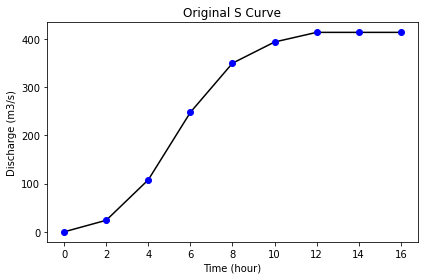

In [7]:
# sCurve = uh4.s_curve(maxTime=25)
sCurve = uh4.s_curve()
sCurve.name = 'Original S Curve'
sCurve.plot()
sCurve

To get a unit hydrograph with shorter duration `D`, the next step is to shift the S curve to right by a distance of `D`. In this tutorial, we let `D = 2 hours` for ease of demonstration, which means we want to get a 2-h unit hydrograph. Therefore, we should shift the orignal S curve 2 hours to right.

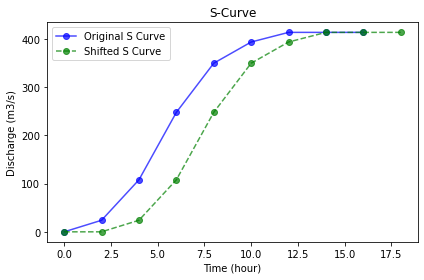

In [8]:
shiftDuration = 2
sCurve2 = uh4.shift_curve(sCurve, shiftDuration)
sCurve2.name = 'Shifted S Curve'
# plot the original and new S curve in a same figure.
rof.plot_Hydrographs([sCurve, sCurve2], name='S-Curve')


The final step is subtract these two curves. More details can be found in `duration_decrease()`.

## Estimation unit hydrographs
Estimation the unit hydrographs from observed flow data.

In [9]:
excessRainfall = [0, 0, 5.1]  # delete all appending zeros
flow = [0, 0, 25, 40, 60, 35, 0, 0, 0] # unit: 
values = rof.estimate_unit_hydrograph(excessRainfall, flow)
values

[4.901960784313726,
 7.8431372549019605,
 11.76470588235294,
 6.862745098039215,
 0.0,
 0.0,
 0.0]

Create the estimated unit hydrograph.

In [10]:
times = [0, 1, 2, 3, 4]
data = values + [0, 0, 0] # make sure `times` and `data` have same size
uh_estimate = UnitHydrograph(times, data, duration=1, timestep=1)
uh_estimate

[Unit Hydrograph]
Time	Value
0	4.901960784313726
1	7.8431372549019605
2	11.76470588235294
3	6.862745098039215
4	0.0

### Test
Regenerate surface runoff. Results show that the generated surface runoff is same as the observed data.

In [11]:
excessRainfall = [5.1]
uh.surface_runoff(excessRainfall)


[Surface Runoff]
Time	Value
0	0.0
2	61.199999999999996
4	214.2
6	357.0
8	260.09999999999997
10	112.19999999999999
12	51.0
14	0.0

## Others
A unit hydrograph also contains some useful information, for example, the basin area, which is independent to the duration of unit hydrographs.

In [12]:
uh2.area(), uh4.area()

(149.04, 149.04)